<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'/content'

In [7]:
blobs= pd.read_csv("drive/MyDrive/DATA/cluster_blobs.csv")

In [8]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [9]:
blobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [10]:
blobs.describe()

,X1,X2
count,1500.000000,1500.000000
mean,-0.379401,2.141568
std,5.215288,6.308511
min,-10.503508,-9.498748
25%,-6.400126,-5.909959
50%,0.676300,5.709203
75%,4.620075,6.934017
max,9.370845,9.871754


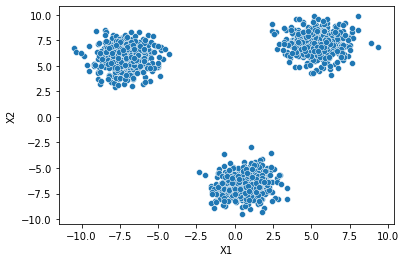

In [12]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [13]:
moons =pd.read_csv('drive/MyDrive/DATA/cluster_moons.csv')

In [14]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


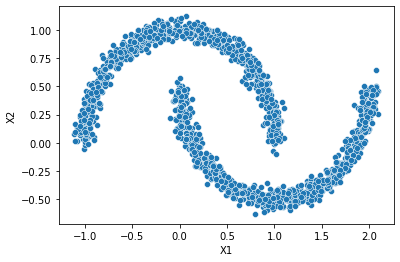

In [16]:
sns.scatterplot(data=moons, x='X1',y="X2")

In [17]:
circles = pd.read_csv('drive/MyDrive/DATA/cluster_circles.csv')

In [18]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


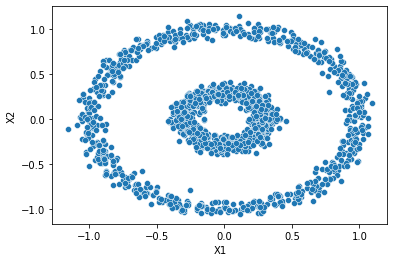

In [20]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [22]:
def disply_categories(model,data):
    labels =model.fit_predict(data)
    sns.scatterplot(data=data, x='X1',y='X2', hue=labels, palette='Set1')

In [26]:
from sklearn.cluster import KMeans

In [31]:
model=KMeans(n_clusters =2)

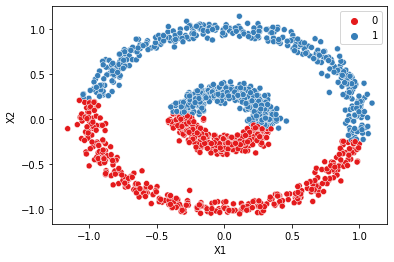

In [33]:
disply_categories(model,circles)

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
model =DBSCAN()

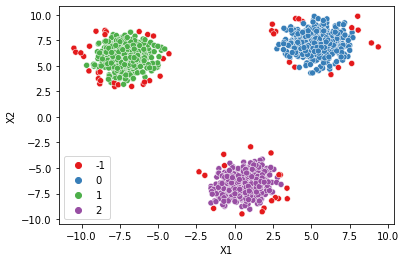

In [38]:
disply_categories(model, blobs)

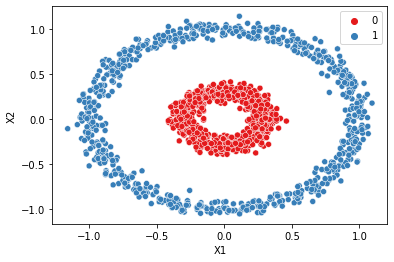

In [41]:
model =DBSCAN(eps=0.15)
disply_categories(model, circles)

In [44]:
two_blobs =pd.read_csv('drive/MyDrive/DATA/cluster_two_blobs.csv')

In [46]:
two_blobs_outliers = pd.read_csv('drive/MyDrive/DATA/cluster_two_blobs_outliers.csv')

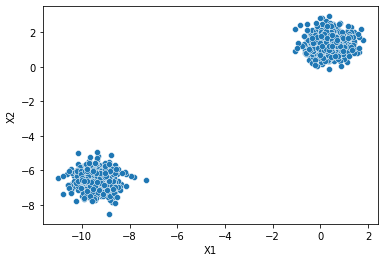

In [47]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

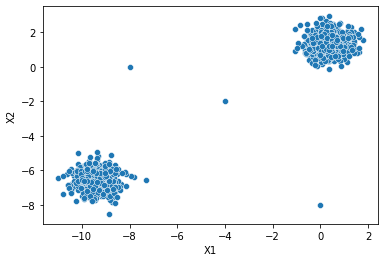

In [48]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [50]:
dbscan =DBSCAN()

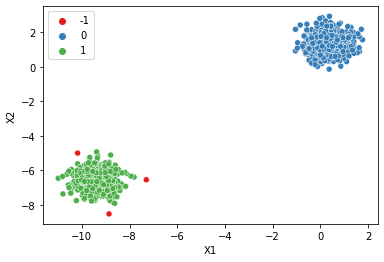

In [51]:
disply_categories(dbscan, two_blobs)

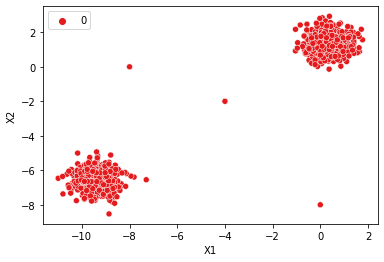

In [65]:
dbscan =DBSCAN(eps=10)
disply_categories(dbscan, two_blobs_outliers)

In [58]:
100 *np.sum(dbscan.labels_== -1)/len(dbscan.labels_)

0.29910269192422734

In [60]:
len(dbscan.labels_)

1003

In [62]:
outlier_percent=[]
number_of_outliers =[]

for eps in np.linspace(0.001, 10, 100):

    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_== -1))
    percent_outliers = 100 *np.sum(dbscan.labels_== -1)/len(dbscan.labels_)

    outlier_percent.append(percent_outliers)

(0.0, 2.0)

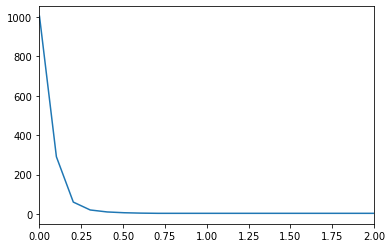

In [67]:
sns.lineplot(x =np.linspace(0.001, 10, 100), y= number_of_outliers)
plt.xlim(0,2)